<a href="https://colab.research.google.com/github/sambhajizambre/Assignments/blob/main/seed%20dataset28.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
from sklearn.metrics import confusion_matrix,accuracy_score,roc_auc_score,roc_curve, classification_report

In [4]:
df=pd.read_excel('/content/drive/MyDrive/python/seeds_dataset.xlsx')
df.head(5)

,Area,Perimeter,Compactness,Length of Kernel,Width of Kernel,Asymmetry coefficient,Length of kernel groove,Class (1_2_3
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


In [5]:
df.shape

(210, 8)

In [6]:
df.describe()

,Area,Perimeter,Compactness,Length of Kernel,Width of Kernel,Asymmetry coefficient,Length of kernel groove,Class (1_2_3
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071,2.000000
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480,0.818448
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000,1.000000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000,1.000000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000,2.000000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000,3.000000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000,3.000000


In [7]:
df.isnull().sum()

Area                       0
Perimeter                  0
Compactness                0
Length of Kernel           0
Width of Kernel            0
Asymmetry coefficient      0
Length of kernel groove    0
Class (1_2_3               0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Area                     210 non-null    float64
 1   Perimeter                210 non-null    float64
 2   Compactness              210 non-null    float64
 3   Length of Kernel         210 non-null    float64
 4   Width of Kernel          210 non-null    float64
 5   Asymmetry coefficient    210 non-null    float64
 6   Length of kernel groove  210 non-null    float64
 7   Class (1_2_3             210 non-null    int64  
dtypes: float64(7), int64(1)
memory usage: 13.2 KB


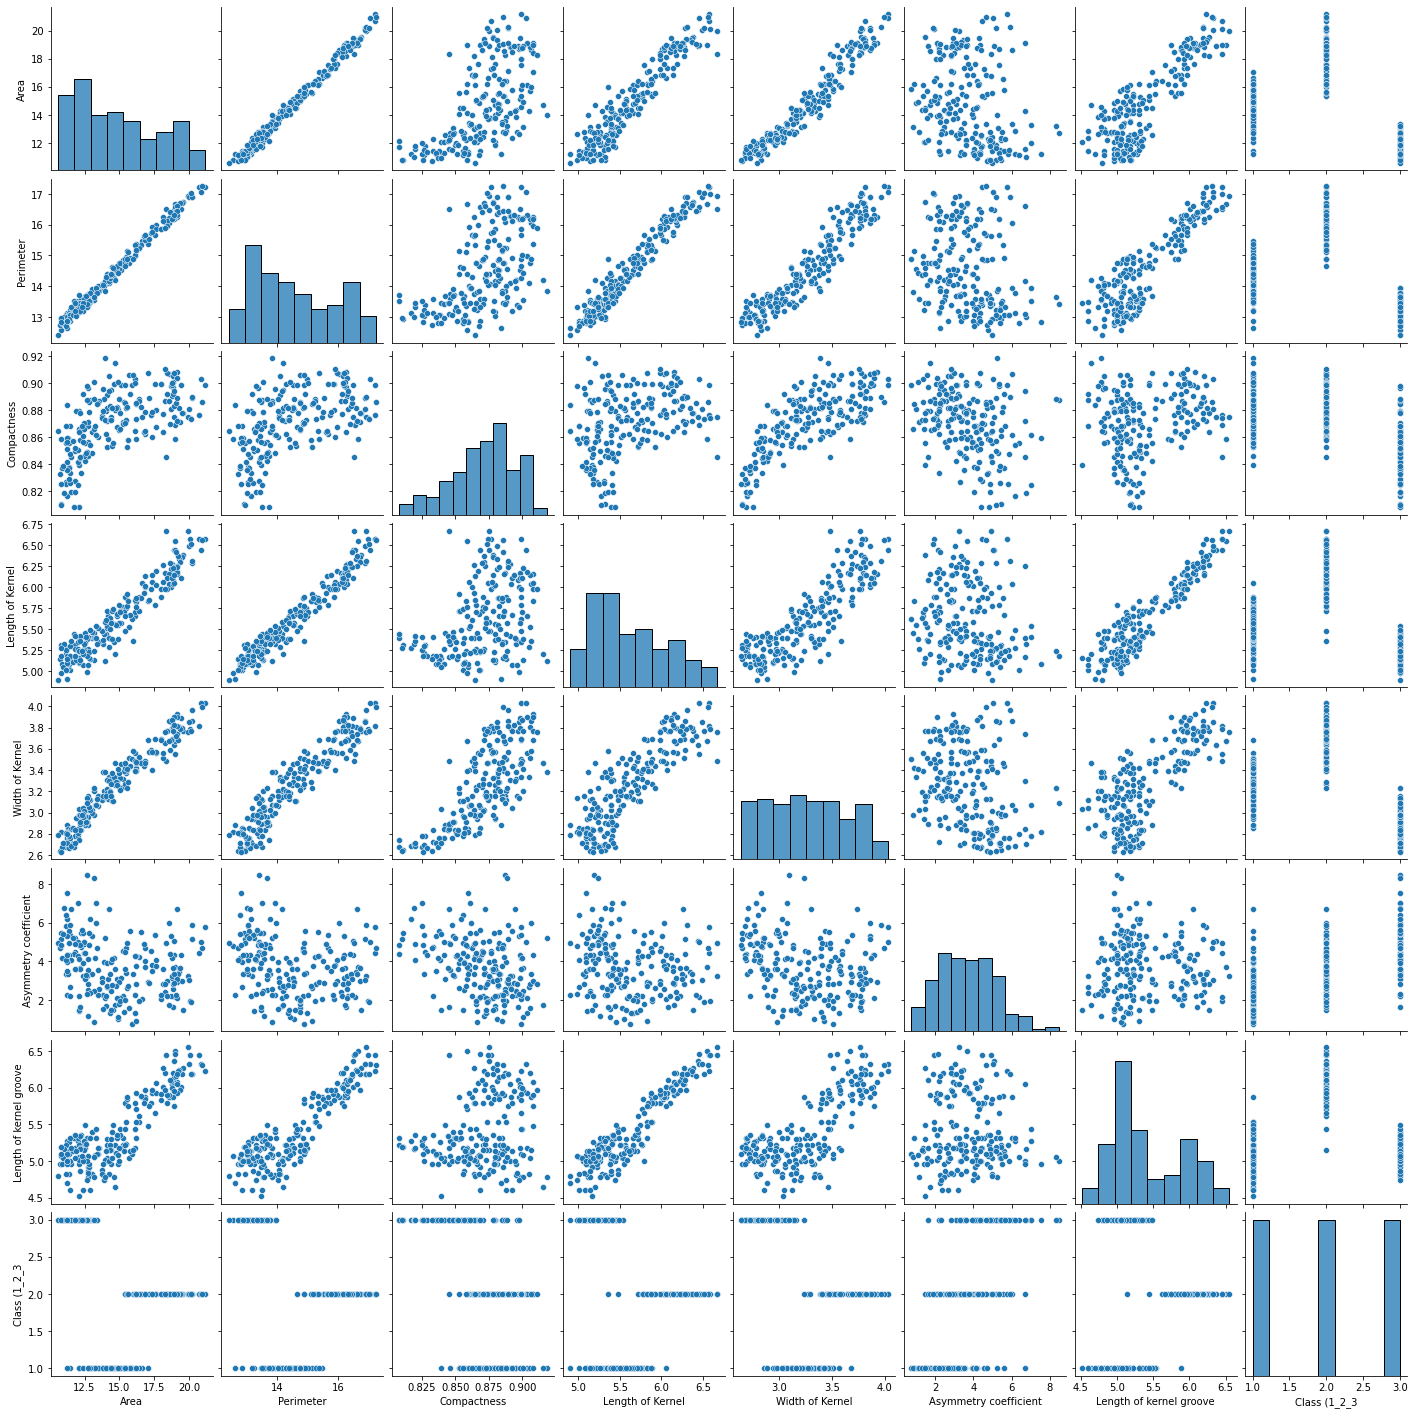

In [9]:
sns.pairplot(df)

# heatmap

(8.0, 0.0)

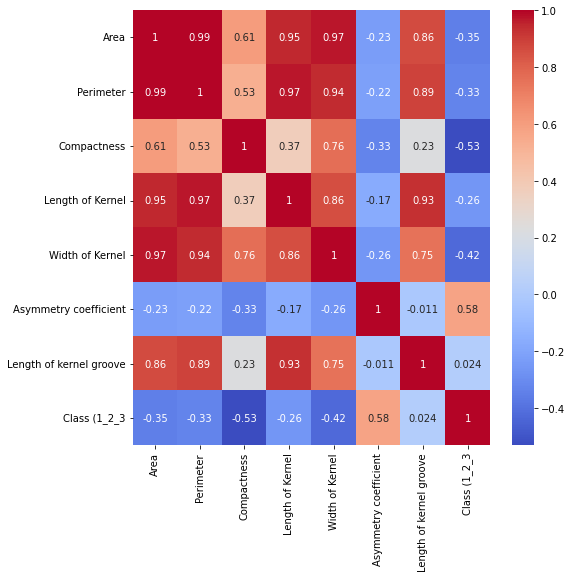

In [10]:
plt.figure(figsize=(8,8))
cor=df.corr()
sns.heatmap(cor,annot=True,cmap='coolwarm')
plt.ylim(8,0)

# **Decision Tree classifier**

In [17]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()

In [18]:
X=df.drop('Class (1_2_3',axis=1)
y=df['Class (1_2_3']

In [19]:
dt.fit(X,y)

DecisionTreeClassifier()

In [21]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=3,test_size=0.30)

In [22]:
dt=DecisionTreeClassifier()

dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [23]:
y_test_pred=dt.predict(X_test)
y_test_prob=dt.predict_proba(X_test)

In [27]:
print ('Confusion Matrix -Test :','\n',confusion_matrix(y_test,y_test_pred))

print ('Overall accuracy -Test :',accuracy_score(y_test,y_test_pred))

print ('AUC -Test :', roc_auc_score(y_test,y_test_prob,multi_class='ovr'))

Confusion Matrix -Test : 
 [[20  1  1]
 [ 2 21  0]
 [ 1  0 17]]
Overall accuracy -Test : 0.9206349206349206
AUC -Test : 0.9410309796444474
